# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [64]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [10]:
mnist =fetch_openml('mnist_784')
x,y = mnist ['data'],mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [11]:
print(x.shape,y.shape)

(70000, 784) (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [16]:
x[36000]
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

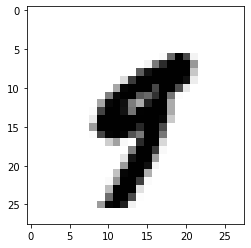

In [21]:
plt.imshow(x[36000].reshape(28,28), cmap= plt.cm.binary, interpolation="nearest");

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [23]:
x_train = x[:60000]
y_train = y[:60000]

x_test = x[60000:]
y_test = y[60000:]

print('train: ',x_train.shape,y_train.shape)
print('test: ',x_test.shape,y_test.shape)

train:  (60000, 784) (60000,)
test:  (10000, 784) (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [33]:
y_fives_train = [1 if n == '5' else 0 for n in y_train]
y_fives_test = [1 if n == '5' else 0 for n in y_test]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

https://builtin.com/data-science/guide-logistic-regression-tensorflow-20

In [35]:
scaler = StandardScaler()
scaler_x_train = scaler.fit_transform(x_train)
scaler_x_test = scaler.fit_transform(x_test)

In [36]:
model = LogisticRegression()
model.fit(scaler_x_train,y_fives_train)

/home/lmadiedo/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [41]:
model.predict(scaler_x_train)[36000]

0

In [ ]:
#it predicts that the 36kth number is not a 5.

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [43]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [44]:
never_5_clf.fit(scaler_x_train,y_fives_train)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [53]:
#Resultados Modelo
model_results = model.predict(scaler_x_test)

In [54]:
#Resultados Never 5 Models
never5_results = never_5_clf.predict(scaler_x_test)

In [56]:
#CONFUSION MATRIX
display(
confusion_matrix(y_fives_test,model_results),
confusion_matrix(y_fives_test,never5_results)
)

array([[9025,   83],
       [ 141,  751]])

array([[9108,    0],
       [ 892,    0]])

In [60]:
#PRECISION
model_precision = precision_score(y_fives_test,model_results)
never5_precision = precision_score(y_fives_test,never5_results)

print(f'model_precision {model_precision}\nnever5_preciion {never5_precision}')

model_precision 0.9004796163069544
never5_preciion 0.0


In [61]:
#RECALL
model_recall = recall_score(y_fives_test,model_results)
never5_recall = recall_score(y_fives_test,never5_results)

print(f'model_recall  {model_recall }\nnever5_recall {never5_recall }')

model_recall  0.8419282511210763
never5_recall 0.0


In [63]:
#F1 Scores
model_f1 = f1_score(y_fives_test,model_results)
never5_f1 = f1_score(y_fives_test,never5_results)

print(f'model_f1 {model_f1}\nnever5_f1 {never5_f1}')

model_f1 0.8702201622247971
never5_f1 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#all indicators are 0 cause the model always predict not 5.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

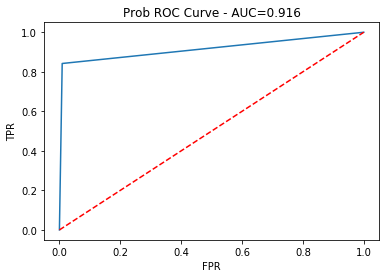

In [69]:
roc_curve_model = roc_curve(y_fives_test,model_results)
fpr, tpr, thresholds = roc_curve_model
a = roc_auc_score(y_fives_test, model_results)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

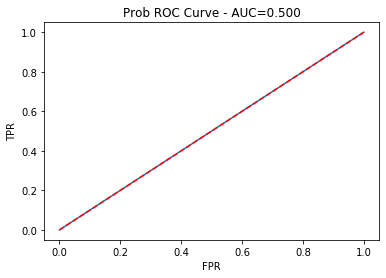

In [70]:
roc_curve_never5  = roc_curve(y_fives_test,never5_results)
fpr, tpr, thresholds = roc_curve_never5
a = roc_auc_score(y_fives_test, never5_results)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'Prob ROC Curve - AUC={a:.3f}')
plt.show();

### Now find the roc_auc_score for each. 

In [77]:
a_model  = roc_auc_score(y_fives_test, model_results)
a_never_5 = roc_auc_score(y_fives_test, never5_results)

print((f'MODEL: ROC - AUC = {a_model:.3f}'))
print((f'NEVER 5: ROC - AUC = {a_never_5:.3f}'))

MODEL: ROC - AUC = 0.916
NEVER 5: ROC - AUC = 0.500


### What does this metric tell you? Which classifier works better with this metric in mind?

In [79]:
# linear regressor model is much more accurate than the never 5 model .
# Never 5 model has an score similar to a  random model 